<a href="https://colab.research.google.com/github/r-hedayati/PublicData/blob/main/PublicData_TimeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dg
from datetime import timedelta
#import sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/active_timeseries_prov.csv'
url2 = 'https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/testing_timeseries_prov.csv'
url3= 'https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/vaccine_completion_timeseries_prov.csv'
url4 = 'https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/vaccine_administration_timeseries_prov.csv'
url5 = 'https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/mortality_timeseries_prov.csv'

df = pd.read_csv(url)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)
df5 = pd.read_csv(url5)


dfAlbertaActive=df[df['province']=='Alberta']
dfAlbertaActive=dfAlbertaActive.rename(columns={'date_active': 'date'})

dfAlbertaTest=df2[df2['province']=='Alberta']
dfAlbertaTest=dfAlbertaTest.rename(columns={'date_testing': 'date'})
dfAlbertaTest.drop(columns='testing_info', inplace=True)

dfAlbertaVaccine=df3[df3['province']=='Alberta']
dfAlbertaVaccine=dfAlbertaVaccine.rename(columns={'date_vaccine_completed': 'date'})


dfAlbertaVaccineAdminstrated=df4[df4['province']=='Alberta']
dfAlbertaVaccineAdminstrated=dfAlbertaVaccineAdminstrated.rename(columns={'date_vaccine_administered': 'date'})

dfAlbertaDeath=df5[df5['province']=='Alberta']
dfAlbertaDeath=dfAlbertaDeath.rename(columns={'date_death_report':'date'})

dfAlberta=pd.merge(dfAlbertaActive,dfAlbertaTest,how='left' ,on='date')
dfAlberta.drop(columns='province_y', inplace=True)
dfAlbertaDeath

,province,date,deaths,cumulative_deaths
0,Alberta,08-03-2020,0,0
1,Alberta,09-03-2020,0,0
2,Alberta,10-03-2020,0,0
3,Alberta,11-03-2020,0,0
4,Alberta,12-03-2020,0,0
...,...,...,...,...
470,Alberta,21-06-2021,2,2292
471,Alberta,22-06-2021,-2,2290
472,Alberta,23-06-2021,2,2292
473,Alberta,24-06-2021,1,2293


Removing outlier data

In [3]:
#dfAlberta=dfAlberta.drop(dfAlberta.index[0:36])
#dfAlberta.at[300,'testing']=20183
dfAlberta[(dfAlberta['active_cases']<8900) & (dfAlberta['active_cases']>8400)].head(30)
dfAlberta.drop(300, inplace=True)
#dfAlbertaActive.nlargest(3,['active_cases'])
#dfAlberta[(dfAlberta['active_cases']==8476)]
#tmp=dfAlberta[dfAlberta['date']=='04-05-2021']
#(tmp['active_cases'].values - 25438 )/tmp['active_cases'].values

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

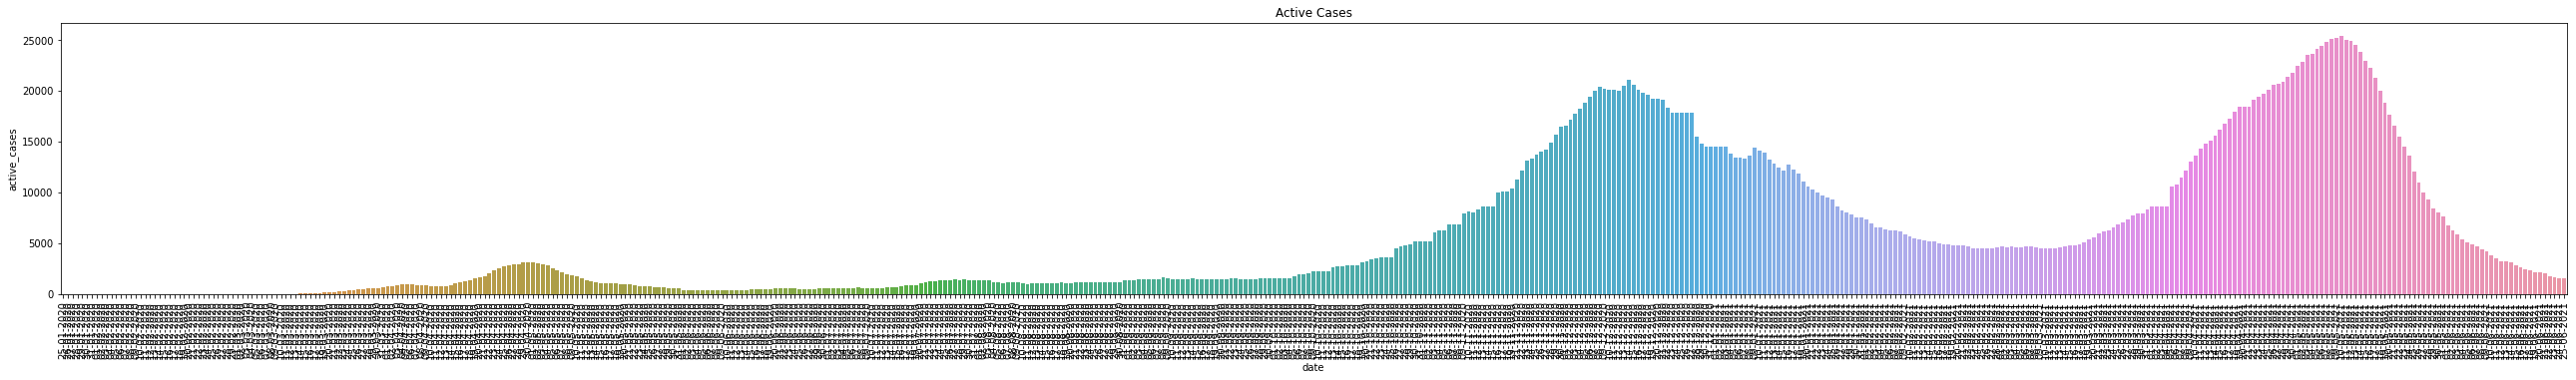

In [5]:
plt.figure(figsize=(45,5))
sns.barplot(x=dfAlberta['date'],y=dfAlberta['active_cases'])
plt.title('Active Cases')
plt.xticks(rotation=90)

Analysis of effectiveness of interventions (III-H report)

Text(0.5, 1.0, 'Effectiveness of AHS Regulations')

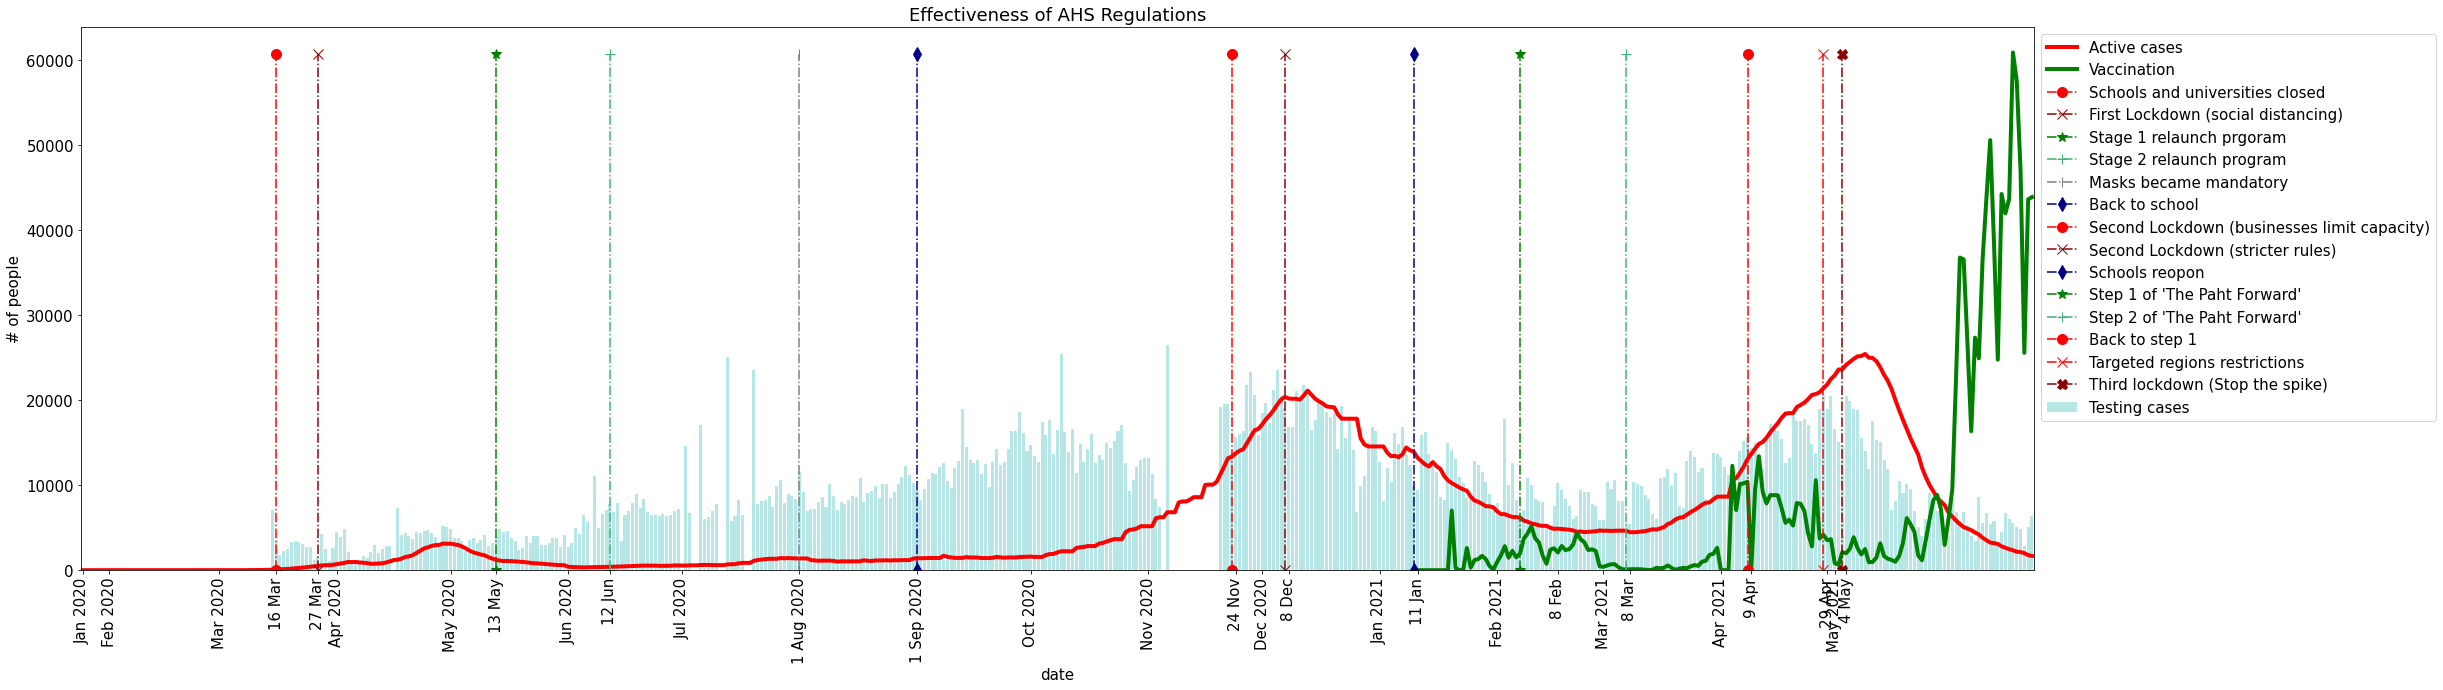

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(dfAlberta['date'],dfAlberta['active_cases'],linewidth=4, color='r', label='Active cases')
plt.plot(dfAlbertaVaccine['date'],dfAlbertaVaccine['cvaccine'],linewidth=4, color='g', label='Vaccination')
#plt.plot(dfAlbertaVaccineAdminstrated['date_vaccine_administered'],dfAlbertaVaccineAdminstrated['avaccine'],linewidth=4, color='b', label='Vaccination')
sns.barplot(x=dfAlberta['date'],y=dfAlberta['testing'], color='paleturquoise', label='Testing cases')
plt.axvline(x='16-03-2020', marker='o', ms=10, ymax=0.95, ls='-.', color='red', label='Schools and universities closed') #Schools, universities closed -- max 50 people allowance -- resturant allowed
plt.axvline(x='27-03-2020', marker='x', ms=10, ymax=0.95, ls='-.', color='darkred', label='First Lockdown (social distancing)') # No dine-in services -- bussiness closed -- social distancing -- max 15 people allowance
plt.axvline(x='13-05-2020', marker='*', ms=10, ymax=0.95, ls='-.', color='green', label='Stage 1 relaunch prgoram')
plt.axvline(x='12-06-2020', marker='+', ms=10, ymax=0.95, ls='-.', color='mediumseagreen', label='Stage 2 relaunch program')
plt.axvline(x='01-08-2020', marker='|', ms=10, ymax=0.95, ls='-.', color='gray', label='Masks became mandatory')
plt.axvline(x='01-09-2020', marker='d', ms=10, ymax=0.95, ls='-.', color='navy', label='Back to school')
plt.axvline(x='24-11-2020', marker='o', ms=10, ymax=0.95, ls='-.', color='red', label='Second Lockdown (businesses limit capacity)')
plt.axvline(x='08-12-2020', marker='x', ms=10, ymax=0.95, ls='-.', color='darkred', label='Second Lockdown (stricter rules)')
plt.axvline(x='11-01-2021', marker='d', ms=10, ymax=0.95, ls='-.', color='navy', label='Schools reopon')
plt.axvline(x='08-02-2021', marker='*', ms=10, ymax=0.95, ls='-.', color='green', label="Step 1 of 'The Paht Forward'")
plt.axvline(x='08-03-2021', marker='+', ms=10, ymax=0.95, ls='-.', color='mediumseagreen', label="Step 2 of 'The Paht Forward'")
plt.axvline(x='09-04-2021', marker='o', ms=10, ymax=0.95, ls='-.', color='red', label="Back to step 1")
plt.axvline(x='29-04-2021', marker='x', ms=10, ymax=0.95, ls='-.', color='red', label="Targeted regions restrictions")
plt.axvline(x='04-05-2021', marker='X', ms=10, ymax=0.95, ls='-.', color='darkred', label="Third lockdown (Stop the spike)")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.xticks([0, 7, 36, 67, 97, 128, 158, 250, 281, 311, 342, 373, 401, 432, 462,
            51, 62 , 109, 139, 189, 220, 304, 318, 352, 389, 408, 440, 460, 465], 
           ['Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020',
            'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021',
             '16 Mar', '27 Mar', '13 May', '12 Jun', '1 Aug 2020', '1 Sep 2020', '24 Nov', '8 Dec', '11 Jan', '8 Feb', '8 Mar', '9 Apr', '29 Apr', '4 May' ], rotation=90)  # Set text labels and properties.
plt.ylabel('# of people')
plt.rcParams.update({'font.size': 15})
plt.title('Effectiveness of AHS Regulations')


Preporsseing vaccination data

In [ ]:
dfAlbertaVaccine['date']=pd.to_datetime(dfAlbertaVaccine['date'], dayfirst=True)
dfAlbertaVaccineAdminstrated['date']=pd.to_datetime(dfAlbertaVaccineAdminstrated['date'], dayfirst=True)
first_vaccine_date=dfAlbertaVaccineAdminstrated['date'][0]
#print(first_vaccine_date)
dfAlbertaDeath['date']=pd.to_datetime(dfAlbertaDeath['date'], dayfirst=True )
dfAlberta['date']=pd.to_datetime(dfAlberta['date'], dayfirst=True )

sub_dfAlbertaDeath=dfAlbertaDeath[dfAlbertaDeath['date']>=first_vaccine_date]
sub_dfAlbertaActive=dfAlberta[dfAlberta['date']>=first_vaccine_date]
#dfAlbertaVaccineAdminstrated.head(100)
print(sub_dfAlbertaDeath.shape)
print(dfAlbertaVaccineAdminstrated.shape)
print(dfAlbertaVaccine.shape)
dfAlbertaVaccineAdminstrated['date']
dfTest=pd.merge(dfAlbertaVaccine, dfAlbertaVaccineAdminstrated, on='date', how='right')
dfTest=pd.merge(dfTest, sub_dfAlbertaDeath, on='date', how='right')

dfTest.drop(columns=['province_x','province_y'], inplace=True)
dfTest.fillna(0, inplace=True)
#dfTest.info()
#sub_dfAlbertaActive['active_cases']

(193, 4)
(193, 4)
(164, 4)


324    21123
325    20649
326    20169
327    19865
328    19607
       ...  
512     2127
513     2003
514     1773
515     1676
516     1580
Name: active_cases, Length: 193, dtype: int64

Efficacy and health concerns related to vaccinations (III-I report)

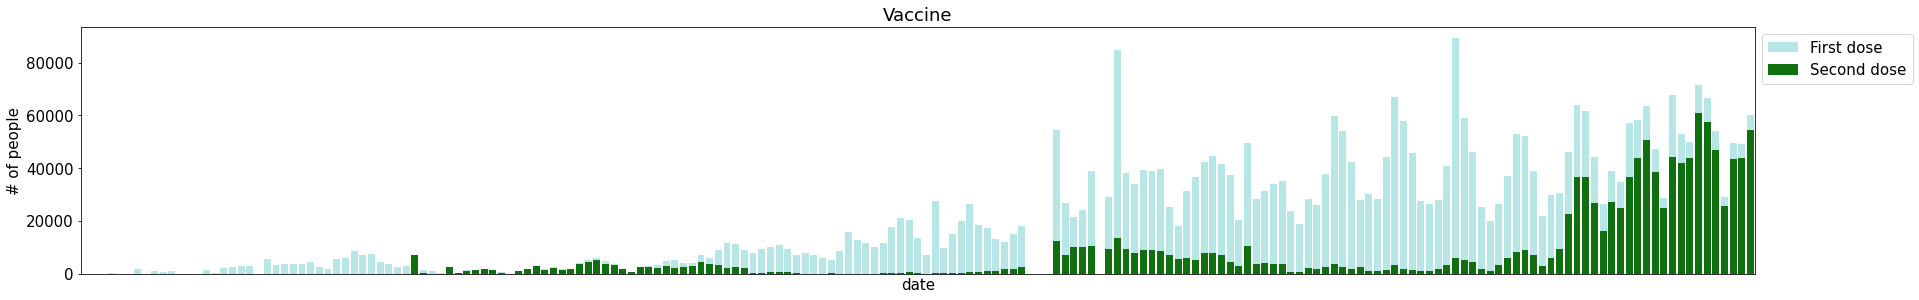

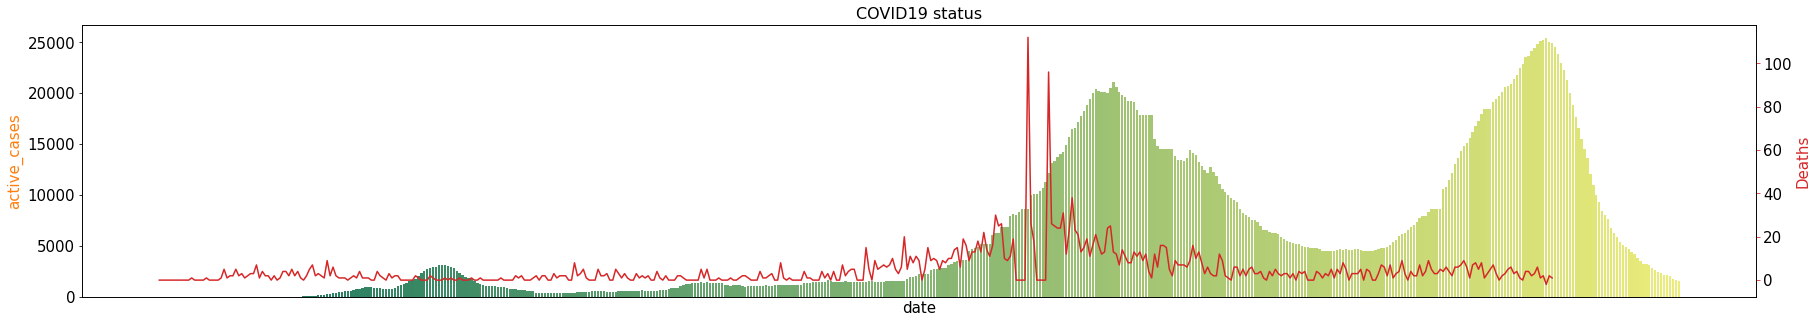

In [ ]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.figure(figsize=(30,10))

plt.subplot(2, 1, 1)
sns.barplot(x=dfTest['date'],y=dfTest['avaccine'], color='paleturquoise', label='First dose')
sns.barplot(x=dfTest['date'],y=dfTest['cvaccine'], color='g', label='Second dose')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off)
plt.title("Vaccine")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.ylabel('# of people')
plt.rcParams.update({'font.size': 15})


#sns.lineplot(x=sub_dfAlbertaActive['date'], y=sub_dfAlbertaActive['active_cases'], label='active cases', ax=axs[0])
#sns.lineplot(x=sub_dfAlbertaDeath['date'], y=sub_dfAlbertaDeath['deaths'], label='deaths', ax=axs[1])

fig, ax1 = plt.subplots(figsize=(30,5))
color = 'tab:orange'
ax1.set_title('COVID19 status', fontsize=16)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Active cases', fontsize=15, color=color)
ax2 = sns.barplot(x='date', y='active_cases', data = dfAlbertaActive, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Deaths', fontsize=15, color=color)
ax2 = sns.lineplot(x='date', y='deaths', data = dfAlbertaDeath, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax1.xaxis.set_major_formatter(DateFormatter("%m-%d"))



# plt.plot(sub_dfAlbertaActive['date'],sub_dfAlbertaActive['active_cases'],linewidth=4, color='y', label='Active cases')
# plt.plot(sub_dfAlbertaDeath['date'], sub_dfAlbertaDeath['deaths']*100, linewidth=4, color='r', label='Deaths')
# plt.title("Cases")
#dfTest['deaths']=dfTest['deaths']*1000
#dfTest.plot(x='date', y=['avaccine','cvaccine','deaths'], kind='bar', figsize=[45,10], width=1.5)
#dfTest.plot(x='date', y='deaths', kind='line', figsize=[45,10])
#sub_dfAlbertaActive.plot(x='date', y=['active_cases'], figsize=[45,10] )
#sns.lineplot(x=dfTest['date'],y=dfTest['deaths']*100,linewidth=4, color='g', label='Vaccination')
#plt.plot(dfAlberta['date'],dfAlberta['active_cases'],linewidth=4, color='r', label='Active cases')
#plt.plot(dfAlbertaVaccine['date'],dfAlbertaVaccine['cvaccine'],linewidth=4, color='g', label='Vaccination')
#plt.bar(sub_dfAlbertaDeath['date'], sub_dfAlbertaDeath['deaths']*100, width=0.8, color='y')
#plt.bar(dfAlbertaVaccineAdminstrated['date'], dfAlbertaVaccineAdminstrated['avaccine'], width=0.8, color='y' )
#sns.barplot(x=dfAlbertaVaccineAdminstrated['date'],y=dfAlbertaVaccineAdminstrated['avaccine'], color='paleturquoise', label='Vaccine first dose')
#sns.barplot(x=dfAlbertaVaccine['date'],y=dfAlbertaVaccine['cvaccine'], color='g', label='Vaccine first dose')
#sns.lineplot(x=dfAlbertaVaccine['date'], y=sub_dfAlbertaDeath['deaths']*1000, color='r', label='deaths')
#sns.barplot(x=sub_dfAlbertaDeath['date'], y=sub_dfAlbertaDeath['deaths']*1000, color='r', label='')
#plt.plot(dfAlbertaDeath['date'],sub_dfAlbertaDeath['deaths']*600,linewidth=4, color='r', label='Deaths')
#sns.barplot(x=dfAlbertaVaccine['date'],y=dfAlbertaVaccine['cvaccine'],linewidth=4, color='b', label='Vaccination')
#plt.plot(dfAlbertaVaccineAdminstrated['date_vaccine_administered'],dfAlbertaVaccineAdminstrated['avaccine'],linewidth=4, color='b', label='Vaccination')
#sns.barplot(x=dfAlbertaVaccineAdminstrated['date'],y=dfAlbertaVaccineAdminstrated['avaccine'], color='paleturquoise', label='Vaccine first dose')
plt.show()